In [2]:
# Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# Twitter Api Credentials
consumerKey = "8gLK2DEUQVG51lEc9ieCC9Q4E"
consumerSecret = "GwZ9LDqqSMrhNUVnsDxiAjOuE1KXSZLmjQhrXNBGtFkP3n9Oqq"
accessToken = "1334056289769385986-34qT5Mqu1N3njNIkSv5NN04F28yXl9"
accessTokenSecret = "7bhxg34h6gNpWfEFwUvXacbuGKD8fhT6GPyzCVebWS3DI"

# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [4]:

# Extract 2000 tweets from the twitter user
posts = api.user_timeline(screen_name="telkomsel", count = 1000, lang ="id", tweet_mode="extended")

#  Print the last 20 tweets
print("Show the 20 recent tweets:\n")
i=1
for tweet in posts[:100]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 20 recent tweets:

1) @rzprygw Kirim via DM ya, agar dapat dibantu pengecekkan dan privasi terjaga. Makasih :) -Ruina (2/2)

2) @rzprygw Hai, Kak. Maaf ya jadi ga nyaman. Mengenai keluhan tidak bisa melakukan panggilan, apakah sebelumnya sudah mencoba refresh jaringan dengan cara restart handphone? Jika sudah mencoba, namun tetap sama, mohon infokan nomor HP, lokasi detail, tanggal kejadian. (1/2)

3) @zxchx_ Hai, Kak. Maaf ya jadi ga nyaman. Mengenai kendala jaringan yang menyebabkan akses internet lambat, mimin infokan saat ini sedang ada peningkatan sistem layanan kami. Diupayakan bisa selesai secepatnya ya, Kak. Makasih untuk tetap menggunakan Telkomsel :) -Ruina

4) @disojuin_ @triindonesia @IndosatOoredoo mohon infokan nomor HP, nama lengkap, tempat dan tanggal lahir. Kirim via DM ya, agar dapat dibantu pengecekkan dan privasi terjaga. Makasih :) -Ruina (2/2)

5) @disojuin_ @triindonesia @IndosatOoredoo Hai, Kak Hiro. Maa ya jadi ga nyaman. Mengenai keluhan tidak ada sin

In [5]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 10 rows of data
df.head()

,Tweets
0,"@rzprygw Kirim via DM ya, agar dapat dibantu p..."
1,"@rzprygw Hai, Kak. Maaf ya jadi ga nyaman. Men..."
2,"@zxchx_ Hai, Kak. Maaf ya jadi ga nyaman. Meng..."
3,@disojuin_ @triindonesia @IndosatOoredoo mohon...
4,"@disojuin_ @triindonesia @IndosatOoredoo Hai, ..."


In [7]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 text = re.sub('\n\n', '',text) #menghapus tanda \n\n
 text = re.sub('_', '',text) #menghapus tanda _
 text = re.sub(r"[-()\"#/@;:<>{}=~|.?,]", "", text)
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,Kirim via DM ya agar dapat dibantu pengecekka...
1,Hai Kak Maaf ya jadi ga nyaman Mengenai keluh...
2,Hai Kak Maaf ya jadi ga nyaman Mengenai kenda...
3,mohon infokan nomor HP nama lengkap tempat ...
4,Hai Kak Hiro Maa ya jadi ga nyaman Mengenai...
...,...
195,78 Jika sudah dan tetap sama yuk infoin nomor ...
196,78 Pagi juga Kak Singgih Maaf ya Terkait kenda...
197,lanjut dan privasi data Kakak tetap terjaga\n...
198,Hai Kak Restu Maaf banget udah dibuat ga nyam...


In [8]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,Kirim via DM ya agar dapat dibantu pengecekka...,0.0,0.0
1,Hai Kak Maaf ya jadi ga nyaman Mengenai keluh...,0.0,0.0
2,Hai Kak Maaf ya jadi ga nyaman Mengenai kenda...,0.0,0.0
3,mohon infokan nomor HP nama lengkap tempat ...,0.0,0.0
4,Hai Kak Hiro Maa ya jadi ga nyaman Mengenai...,0.0,0.0
...,...,...,...
195,78 Jika sudah dan tetap sama yuk infoin nomor ...,0.0,0.0
196,78 Pagi juga Kak Singgih Maaf ya Terkait kenda...,0.0,0.0
197,lanjut dan privasi data Kakak tetap terjaga\n...,0.0,0.0
198,Hai Kak Restu Maaf banget udah dibuat ga nyam...,0.0,0.0


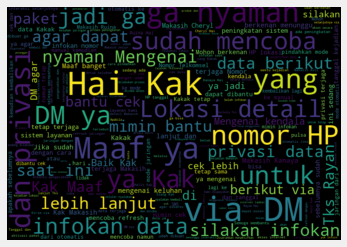

In [9]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=1000, height=700, random_state=21, max_font_size=100).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [10]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,Kirim via DM ya agar dapat dibantu pengecekka...,0.0,0.0,Neutral
1,Hai Kak Maaf ya jadi ga nyaman Mengenai keluh...,0.0,0.0,Neutral
2,Hai Kak Maaf ya jadi ga nyaman Mengenai kenda...,0.0,0.0,Neutral
3,mohon infokan nomor HP nama lengkap tempat ...,0.0,0.0,Neutral
4,Hai Kak Hiro Maa ya jadi ga nyaman Mengenai...,0.0,0.0,Neutral
...,...,...,...,...
195,78 Jika sudah dan tetap sama yuk infoin nomor ...,0.0,0.0,Neutral
196,78 Pagi juga Kak Singgih Maaf ya Terkait kenda...,0.0,0.0,Neutral
197,lanjut dan privasi data Kakak tetap terjaga\n...,0.0,0.0,Neutral
198,Hai Kak Restu Maaf banget udah dibuat ga nyam...,0.0,0.0,Neutral


In [11]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

Printing positive tweets:

1) 7 Makasih Kak Azarya udah berkenan nunggu Terkaiat kendala sudah melakukan pembelian paket OMG! 27GB namun kuota belum didapatkan Silakan Kakak infokan data berikut via DM agar dapat di bantu cek dan privasi terjaga
1 Nomor HP
2 Lokasi detail Have a nice day  Kanaya

2)   1 Nomor HP
2 Lokasi detail
3 Waktu dan tanggal kejadian
4 Capture keterangan yang didapat Have a nice day  Kanaya 22

3)  Oke Kak Cicilia Makasih ya udah menghubungi layanan Social Media Telkomsel Kalo ada hal lain yang diperlukan jangan sungkan menghubungi kami kembali ya Kak Selamat melanjutkan aktivitas sehat selalu dan jangan lupa pakai masker  Ruina

4)  Oke Kak Muse Makasih ya udah menghubungi layanan Social Media Telkomsel Kalo ada hal lain yang diperlukan jangan sungkan menghubungi kami kembali ya Kak Selamat melanjutkan aktivitas sehat selau dan jangan lupa pakai masker  Ruina

5) 02 Hai Kak Asrudin Maaf atas kendalanya Untuk keluhan tidak ada paket internet di aplikasi MyTelkoms

In [12]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1)  Duh maaf ya Kak  Mengenai Paket Combo Sakti merupakan Paket Promo ya Kak Telkomsel memberikan penawaran secara personal sesuai dengan profile masingmasing pelanggan berdasarkan lama berlangganan dan ratarata penggunaan dalam periode waktu yang telah ditentukan 12

2)    2 Twitter 
3 Call Center Telkom 147 Semoga membantu  Ruina 22



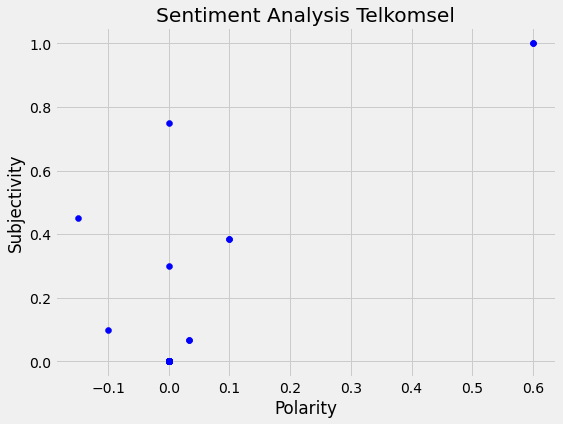

In [13]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis Telkomsel') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [14]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

3.0

In [15]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

1.0

In [16]:
# Show the value counts
df['Analysis'].value_counts()

Neutral     192
Positive      6
Negative      2
Name: Analysis, dtype: int64

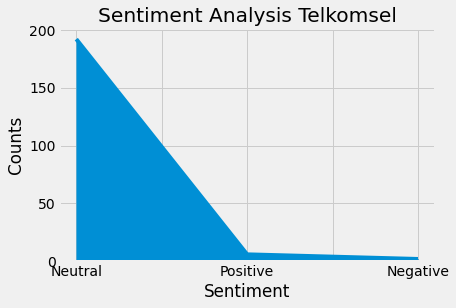

In [17]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis Telkomsel')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'area')
plt.show()

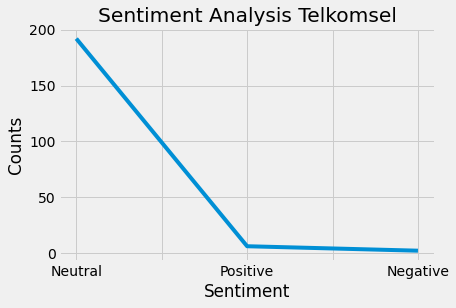

In [18]:
plt.title('Sentiment Analysis Telkomsel')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'line')
plt.show()